# The Law of Large Numbers (LLN)


> This theorem is a fundamental result in probability theory. It describes **the results of performing the same experiment a large number of times**. 

> According to this law, **the average of the results obtained from a larger number of trials should be close to the expected value, the theoretical average value**, and it will tend to become closer to the expected value as more trials as performed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rolling a dice

Rolling a dice is a random experiment with 6 possible outcomes : 1, 2, 3, 4, 5, 6.

[numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) returns a random integer between `low` (inclusive) and `high` (exclusive)

In [2]:
# Run this cell multiple times
np.random.randint(1,6+1)

4

* Everytime you run this cell, you are throwing a dice and the outcome if this experiment is totally random (1, 2, 3, 4, 5 or 6), we simply call it a **`random experiment`**.
* How would you roll 3 dices simultaneously. Read the [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) docs and roll these three dice.

In [3]:
np.random.randint(1,6+1,3)

array([5, 4, 4])

So now, let's roll our dice `n = 20` times and compute the average outcome. Store the results in an `outcomes` variable and the average of these outcomes in an `average_outcome` variable.

In [4]:
n = 20 # number of times you are rolling your dice

outcomes = np.random.randint(1,6+1,n)

average_outcome = np.mean(outcomes)

In [5]:
outcomes

array([5, 2, 6, 2, 5, 1, 1, 2, 2, 5, 2, 1, 2, 1, 4, 2, 2, 2, 6, 4])

In [6]:
average_outcome

2.85



We can represent the different outcomes of the random experiment "rolling a dice" into a table with their respective probabilities.



| Possible outcomes | 1   | 2   | 3   | 4   | 5   | 6   | Total |
|-------------------|-----|-----|-----|-----|-----|-----|-------|
| Probabilities     | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 100%  |
    
The `expected/theoretical average value` can be computed as follows:
    

$$ \mathbb{E}[X] = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5 $$
 
where `X` denotes the `random outcome` of `rolling a dice`.

 We say that `X` is a `random variable`

</details>

--- 

 Let's verify the Law of Large Numbers for this rolling a dice experiment.

***Questions :***

 Play with the number of trials and compute the associated average outcome.

 Plot the average outcome vs. the number of trials.

In [8]:
mu = 3.5

In [9]:
number_of_trials = 5000 # play with this number
trials = np.arange(1,number_of_trials + 1,1)
results = []

# Step-by-step version
for n in trials:
    # roll your dice n times
    tmp = np.random.randint(1,6+1, n)
    # compute the average outcome of these n dice
    average_outcome = np.mean(tmp)
    # store it in the list of results
    results.append(average_outcome)



In [10]:
# One-liner version
results = []
for n in trials:
    results.append(np.mean(np.random.randint(1,6+1, n)))

In [11]:
# One-liner version with list comprehensions
results = [np.mean(np.random.randint(1,6+1, n)) for n in trials]

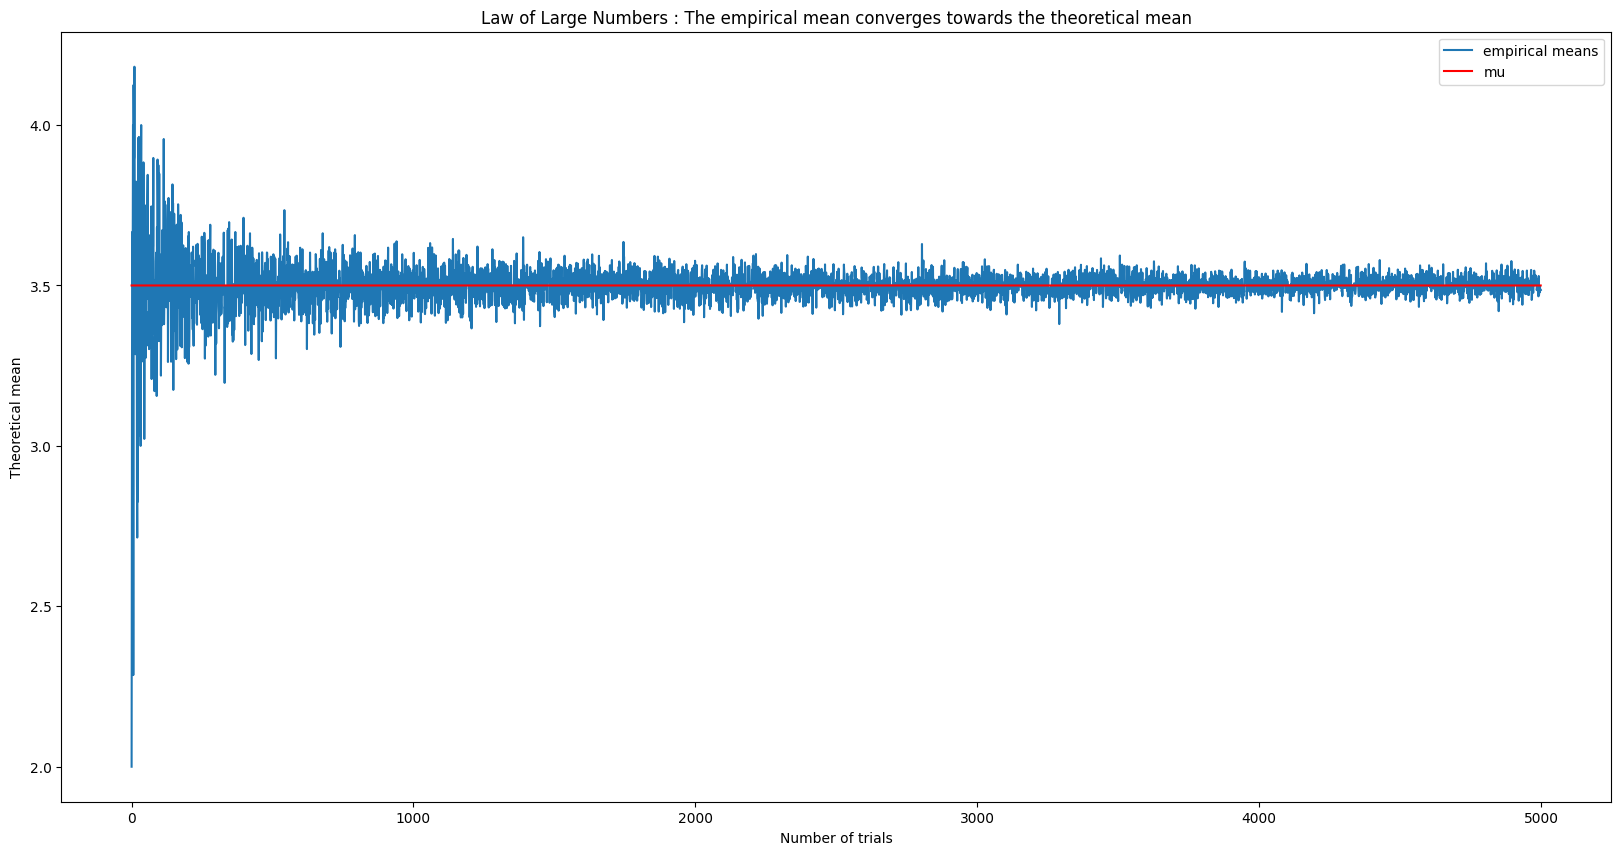

In [12]:
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([mu]*len(results),label='mu', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

 We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 3.5 $ as the *number of trials n increases* !

## Tossing a coin 

### One time

Let's run the same experiment with toss a coin instead.

* The outcomes are now 0 and 1.
* If you run the experiment 100 times, most likely you will have approximately 50 heads and 50 tails.
* Let's define "head" as a successful experiment and $p$ as the probability of having a head. Intuitively, $ p = \frac{1}{2} = 0.5 = 50 \%$

A random experiment with two possibles outcomes `success/failure`and $p$ as the `probability of success` is said to follow a **`Bernoulli distribution`** with parameter `p` $ \in [0,1] $

Let's verify the `Law of Large Numbers` for this `tossing a coin` experiment.

***Questions :***

`Play with the number of trials in the cell below` and visualize the associated plot of average outcome vs. the number of trials.

In [13]:
number_of_trials = 500 # play this this number
p = 0.5 # expected value of the coin

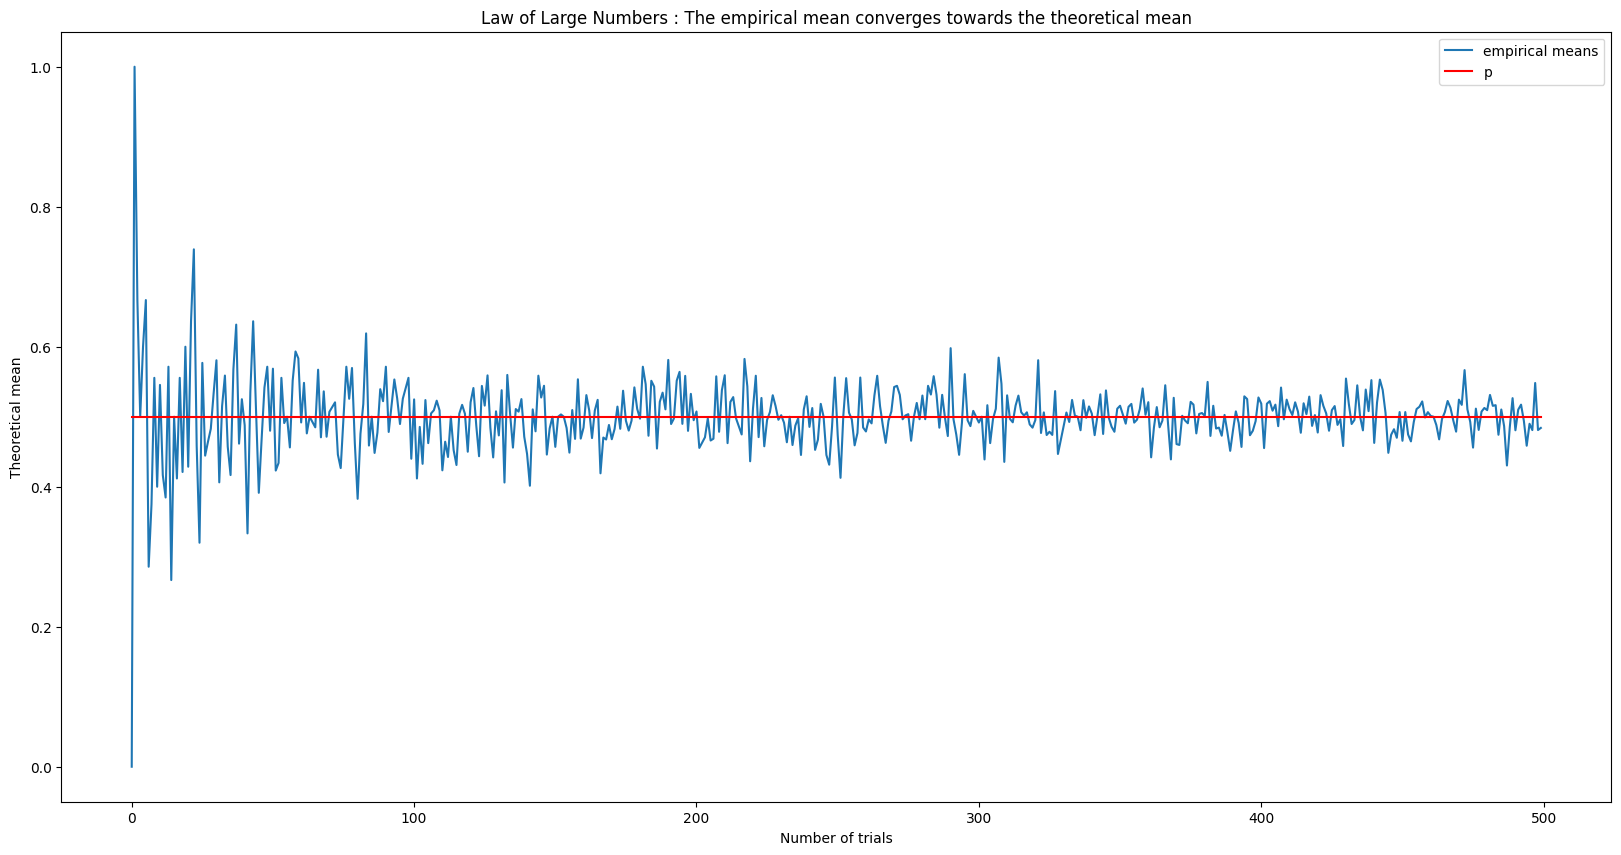

In [14]:
#     playing with the number of trials

trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(0,1+1, n)) for n in trials]

#            plotting the results
        
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([p]*len(results),label='p', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

We can visually notice that the `empirical mean` $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `converges towards the expected value` $ \mu = 0.5 $ as the *number of trials n increases* !

### Multiple times

 Here, ***ONE experiment*** consists of :
* tossing a coin `n_times`
* every trial has a `probability p` of success.

 After running one experiment, we can count the `number of successes` between `no success` and `n_times successes`.

 A random experiment with:
- two possible outcomes `success/failure`
- `p` $ \in [0,1] $ as the `probability of success`
- `n` $ \in \mathbb{N} $ trials

is said to follow a **`Binomial distribution (n,p)`** distribution.

**`A Binomial distribution (n,p) is the sum of n independent Bernoulli(p) random variables`**.

---

In the following cell, use [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) to simulate **ONE Binomial Experience** in Python with:
- $p = 0.7$ (imagine that your coin is biased)
- $n = 10$ trials



In [15]:
# Run this cell multiple times 
# for one realisation of a Binomial Experience

n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

print(f"Tossing a (unfair) coin {n} times with a probability {p} of getting a head...")
print("-"*5)

result = np.random.binomial(n = n, p = p, size = 1)
print(f"result = {result}")

print("-"*5)
print(f"Among these {n} coins, {result[0]} were HEADS (and {n - result[0]} turned out to be TAILS)")

Tossing a (unfair) coin 10 times with a probability 0.7 of getting a head...
-----
result = [7]
-----
Among these 10 coins, 7 were HEADS (and 3 turned out to be TAILS)


Now, repeat this experiment $N = 20$ times and store the N results in a list

Run the cell multiple times and observe the randomness.

In [16]:
# Run this cell multiple times 
# for N realisations of a Binomial Experience

N = 20  # number of experiment
n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

my_realisations = np.random.binomial(n = n, p = p,size = N)

print(f"On average, among my {N} realisations, I had on average {np.mean(my_realisations)} successes out of {n} coins tossed")

On average, among my 20 realisations, I had on average 7.1 successes out of 10 coins tossed


Let's verify the `Law of Large Numbers` for this `tossing a coin multiple times` experiment

***Questions:***

What average value did you expect ? Store into a `expected_value_coins` variable.

In [17]:
expected_value_coins = None

In [18]:
expected_value_coins = 7

For one Binomial Experience with $n = 10$ tosses and $p = 0.7$, you would expect $ n \times p = 10 \times 0.7 = 7$ successes.
    
This result holds for any `Binomial(n,p)` random experiment!
    
$$ \mathbb{E}[X] = np $$
    
</details>

Vizualize these results below:

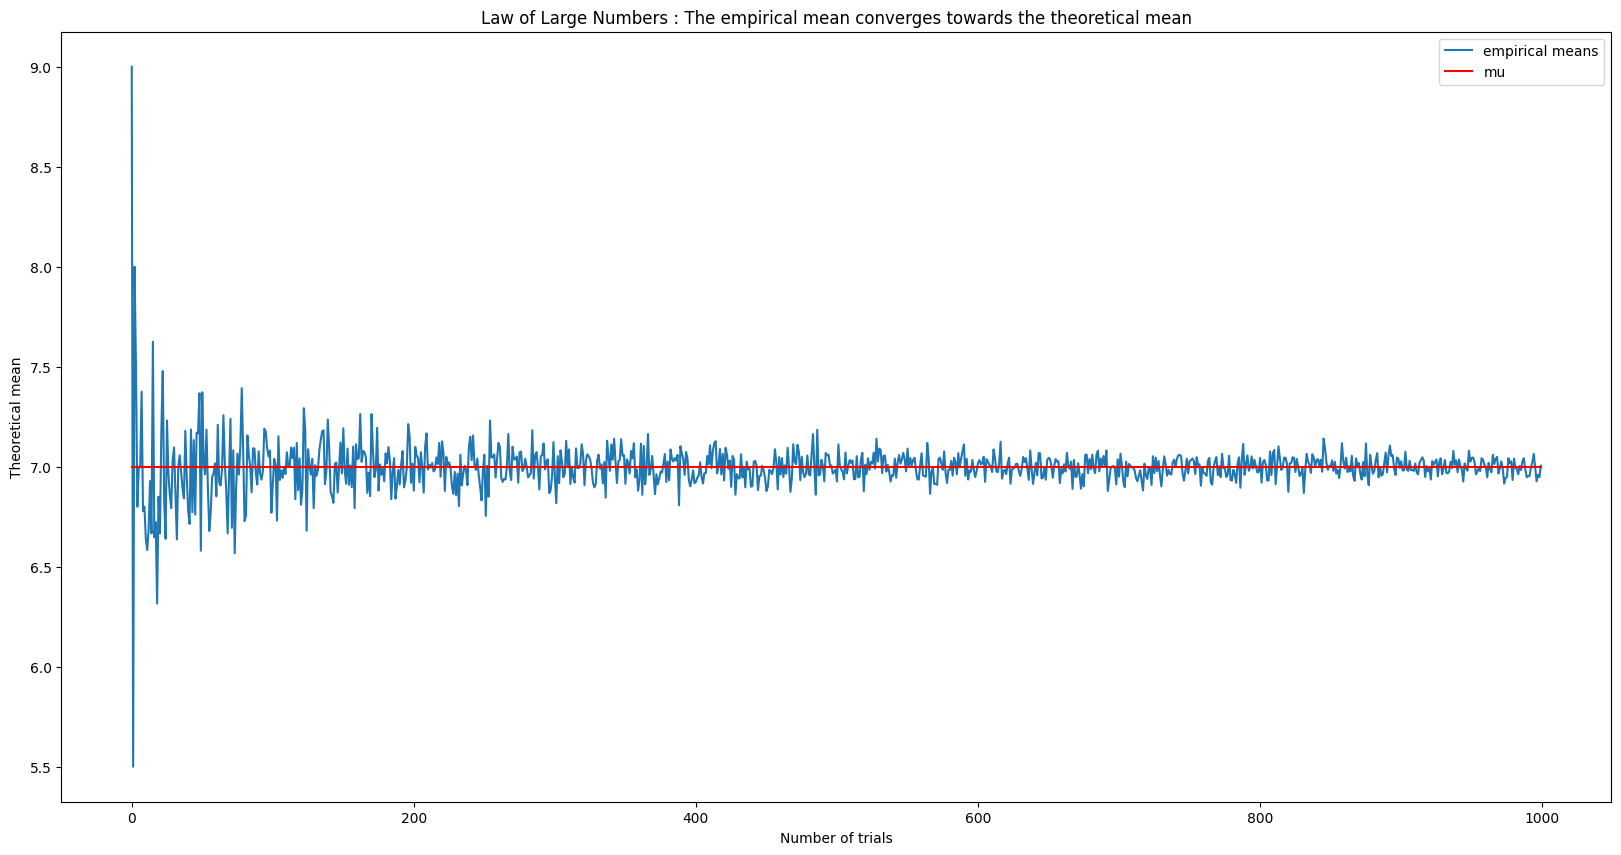

In [19]:
#     playing with the number of trials

p = 0.7
n = 10
N = 1000

trials = np.arange(1,N + 1,1)
results = [np.mean(np.random.binomial(n = n,p = p, size = N)) for N in trials]
    
#            plotting the results
    
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([expected_value_coins]*len(results),label='mu', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()